In [1]:
#work_year: The year the salary was paid.
#experience_level: The experience level in the job during the year
#employment_type: The type of employment for the role
#job_title: The role worked in during the year.
#salary: The total gross salary amount paid.
#salary_currency: The currency of the salary paid as an ISO 4217 currency code.
#salaryinusd: The salary in USD
#employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
#remote_ratio: The overall amount of work done remotely
#company_location: The country of the employer's main office or contracting branch
#company_size: The median number of people that worked for the company during the year

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *

In [3]:
data = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
def countplt(col):
    columns = col.value_counts().sort_values(ascending = False).head(5)
    plt.figure(figsize=(15, 12))
    sns.countplot(data = data, x = col)
    plt.show()

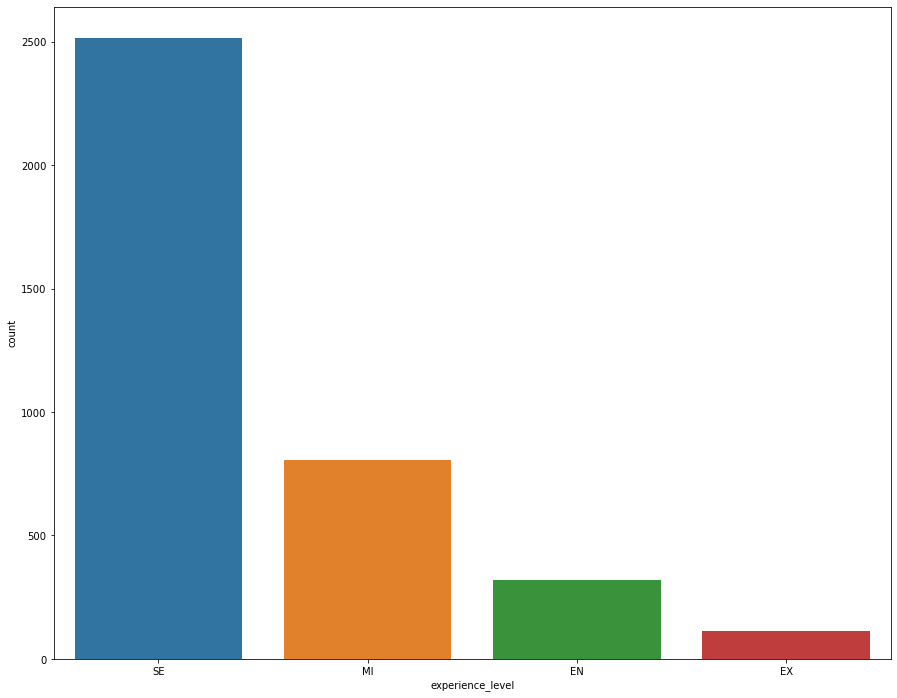

In [5]:
countplt(data['experience_level'])

Let's see how many people with different levels of the total, the Seniors were the most, followed by the Midles, but the difference between them is very large, compared with beginners

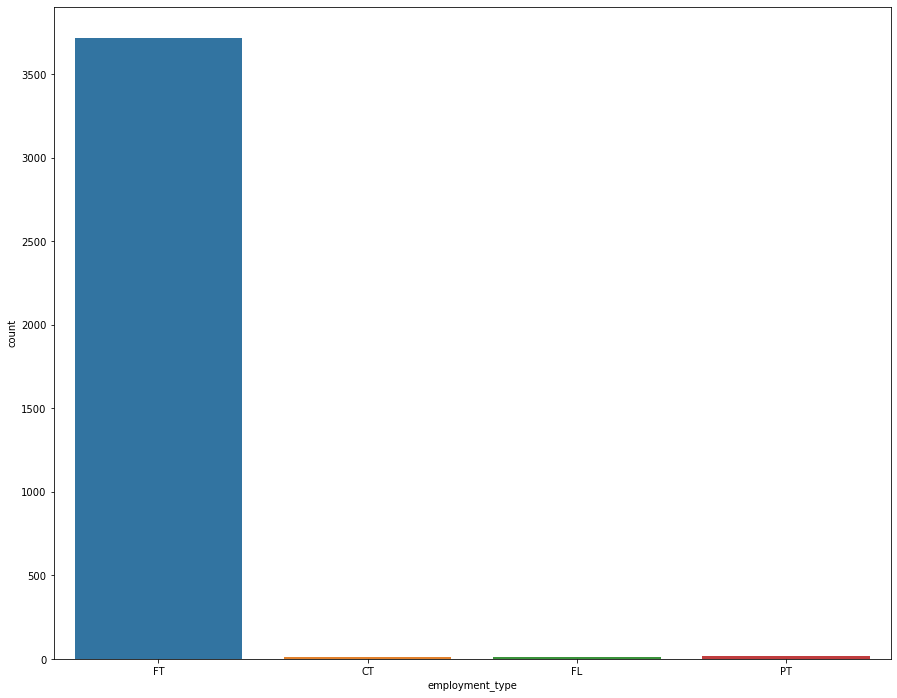

In [6]:
countplt(data['employment_type'])

Here you can see that the majority worked full time, and the rest (Contract, Freelance, Part Time) are already in the minority 

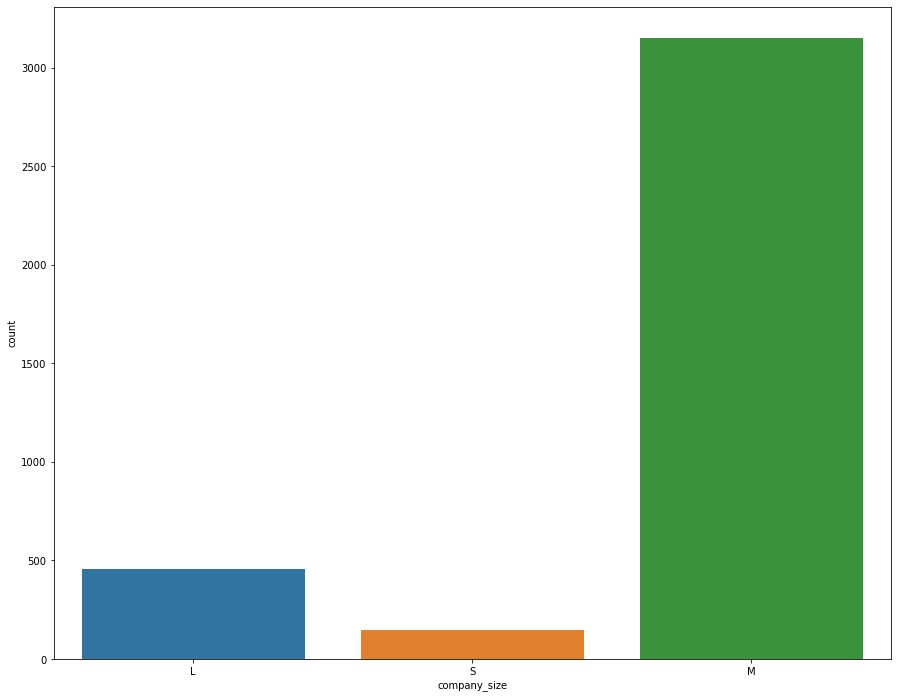

In [7]:
countplt(data['company_size'])

Medium-sized companies have taken the most people over the year, while the other two have been doing stably

In [8]:
job = []
mean_salary = []

In [9]:
job_grb = data.groupby('job_title')
job_grb

In [10]:
for i in data['job_title']:
    job.append(i)
    m_sal = job_grb.get_group(i)['salary_in_usd'].mean()
    mean_salary.append(m_sal)

In [11]:
df = {'jobs':job, 'mean_salary':mean_salary}
df = pd.DataFrame(df)

In [12]:
df.sort_values(['mean_salary'], ascending = False, inplace = True)
df

,jobs,mean_salary
2359,Data Science Tech Lead,375000.00
3063,Cloud Data Architect,250000.00
1644,Data Lead,212500.00
1643,Data Lead,212500.00
1549,Data Analytics Lead,211254.50
...,...,...
2022,3D Computer Vision Researcher,21352.25
3537,3D Computer Vision Researcher,21352.25
183,Staff Data Analyst,15000.00
2589,Product Data Scientist,8000.00


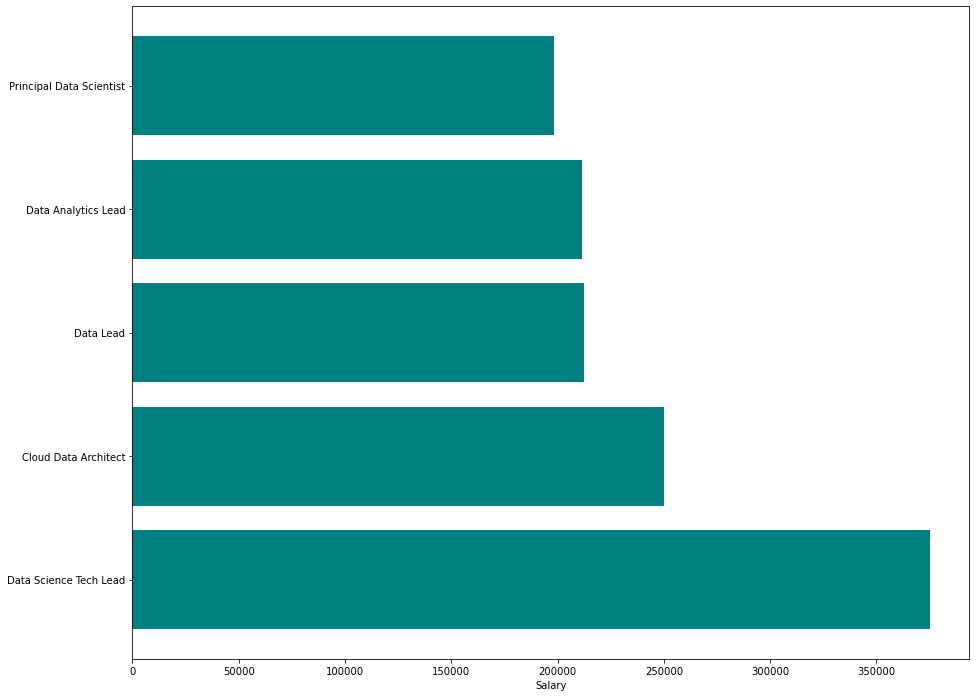

In [13]:
plt.figure(figsize = (15, 12))
plt.barh(df['jobs'].head(10), df['mean_salary'].head(10), color = 'teal')
plt.xlabel('Salary')
plt.show()

So we found out how much different professions get, the most gets Data Science Tech Lead (the concept of this part of the code has been borrowed). What I did: first I created lists of job and mean_salary, then I grouped the professions themselves, put it all into a loop, and selected the average salary by profession, turned everything into a dataframe, sorted by salary, and finally made a graph

In [14]:
jobs = data[data['work_year'] == 2023]['job_title'].value_counts().nlargest(10).reset_index()
jobs

,index,job_title
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


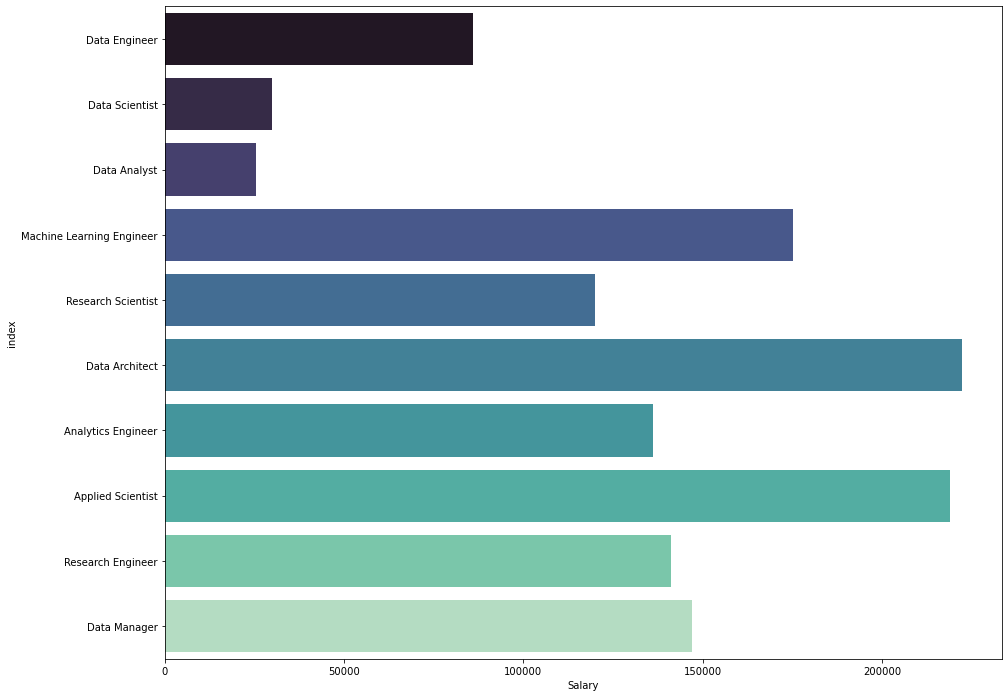

In [15]:
plt.figure(figsize = (15, 12))
sns.barplot(data = jobs, x=data['salary_in_usd'], y = jobs['index'], palette='mako')
plt.xlabel('Salary')
plt.show()

The meaning of this chart is the same as the last one, except there are more professions

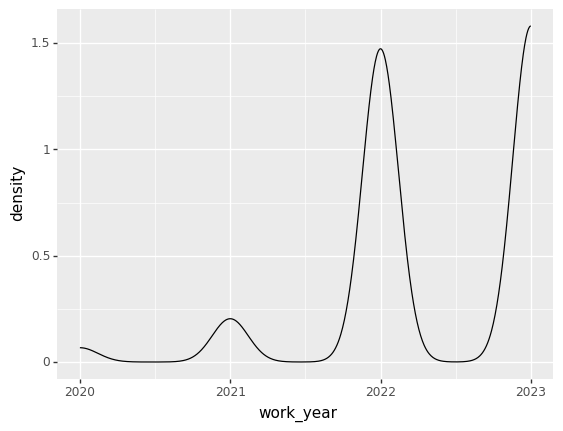

<ggplot: (151861866584)>

In [16]:
(ggplot(data) + aes(x='work_year') + geom_density())

In 2020 was not so common work, but from 2021 the trend began to grow simply exponentially, compare 2021 and 2022, it's just something, so quickly everything has grown, and with 2023 not particularly great difference